In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from preamble import *

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score:", logreg.score(X_train, y_train))
print("Test set score:", logreg.score(X_test, y_test))

Training set score: 0.9553990610328639
Test set score: 0.958041958041958


C:\Users\Protech\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
# C = 100
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score:", logreg100.score(X_train, y_train))
print("Test set score:", logreg100.score(X_test, y_test))

Training set score: 0.971830985915493
Test set score: 0.965034965034965


C:\Users\Protech\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
# C = 0.01
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score:", logreg001.score(X_train, y_train))
print("Test set score:", logreg001.score(X_test, y_test))

Training set score: 0.9342723004694836
Test set score: 0.9300699300699301


C:\Users\Protech\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


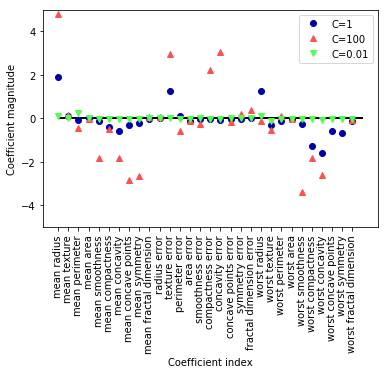

In [11]:
# visualisasi 
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

C:\Users\Protech\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Protech\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training acc dari l1 logreg dengan C=0.001: 0.91
Test acc dari l1 logreg dengan C=0.001: 0.92


C:\Users\Protech\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Protech\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training acc dari l1 logreg dengan C=1.000: 0.96
Test acc dari l1 logreg dengan C=1.000: 0.96
Training acc dari l1 logreg dengan C=100.000: 0.99
Test acc dari l1 logreg dengan C=100.000: 0.98


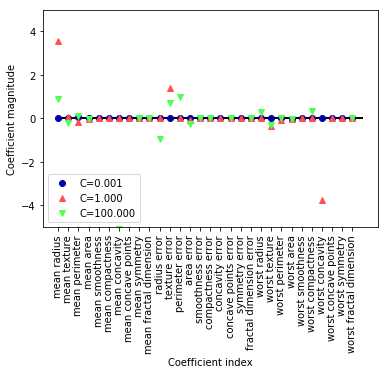

In [16]:
# visualisasi dengan l1 regularization
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    logregl1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    
    print("Training acc dari l1 logreg dengan C={:.3f}: {:.2f}".format(
            C, logregl1.score(X_train, y_train)))
    print("Test acc dari l1 logreg dengan C={:.3f}: {:.2f}".format(
            C, logregl1.score(X_test, y_test)))
    plt.plot(logregl1.coef_.T, marker, label="C={:.3f}".format(C))
        
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend(loc=3)